# Domain Analysis

INX Future Inc,(referred as INX ), is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
years. INX human resource policies are considered as employee friendly and widely perceived as best
practices in the industry.

Recent years, the employee performance indexes are not healthy and this is becoming a growing
concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by **8 percentage points.**

CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing
employees as this would affect the employee morale of all the employees in general and may further
reduce the performance. Also, the market perception best employer and thereby attracting best talents
to join the company.

Mr. Brain decided to initiate a data science project , which analyses the current employee data and find
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects
the findings of this project will help him to take right course of actions. He also expects a clear indicators
of non performing employees, so that any penalization of non-performing employee, if required, may
not significantly affect other employee morals.

**The following insights are expected from this project.**
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

# Importing Modules and Reading file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls') # Reading excel file

In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
pd.set_option('display.max_columns', None)

# Basic Checks

In [5]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [6]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

##### 1. There are no missing values.
##### 2. There are 19 numerical features and 9 categorical features which needs to convert into numerical features.
##### 3. There are total 28 columns.

In [8]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


# Exploratory Data Analysis

### Univariant Analysis

In [9]:
import sweetviz as sv

my_report=sv.analyze(data)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
# Here we can see 'EmpNumber' feature is having all unique values so we can remove this column
data.drop('EmpNumber', axis=1, inplace=True)
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


### Bivariant Analysis

In [11]:
# Continuous data
data1=data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

# Discrete data
data2=data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance']]

# Categorical data
data3=data[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']]

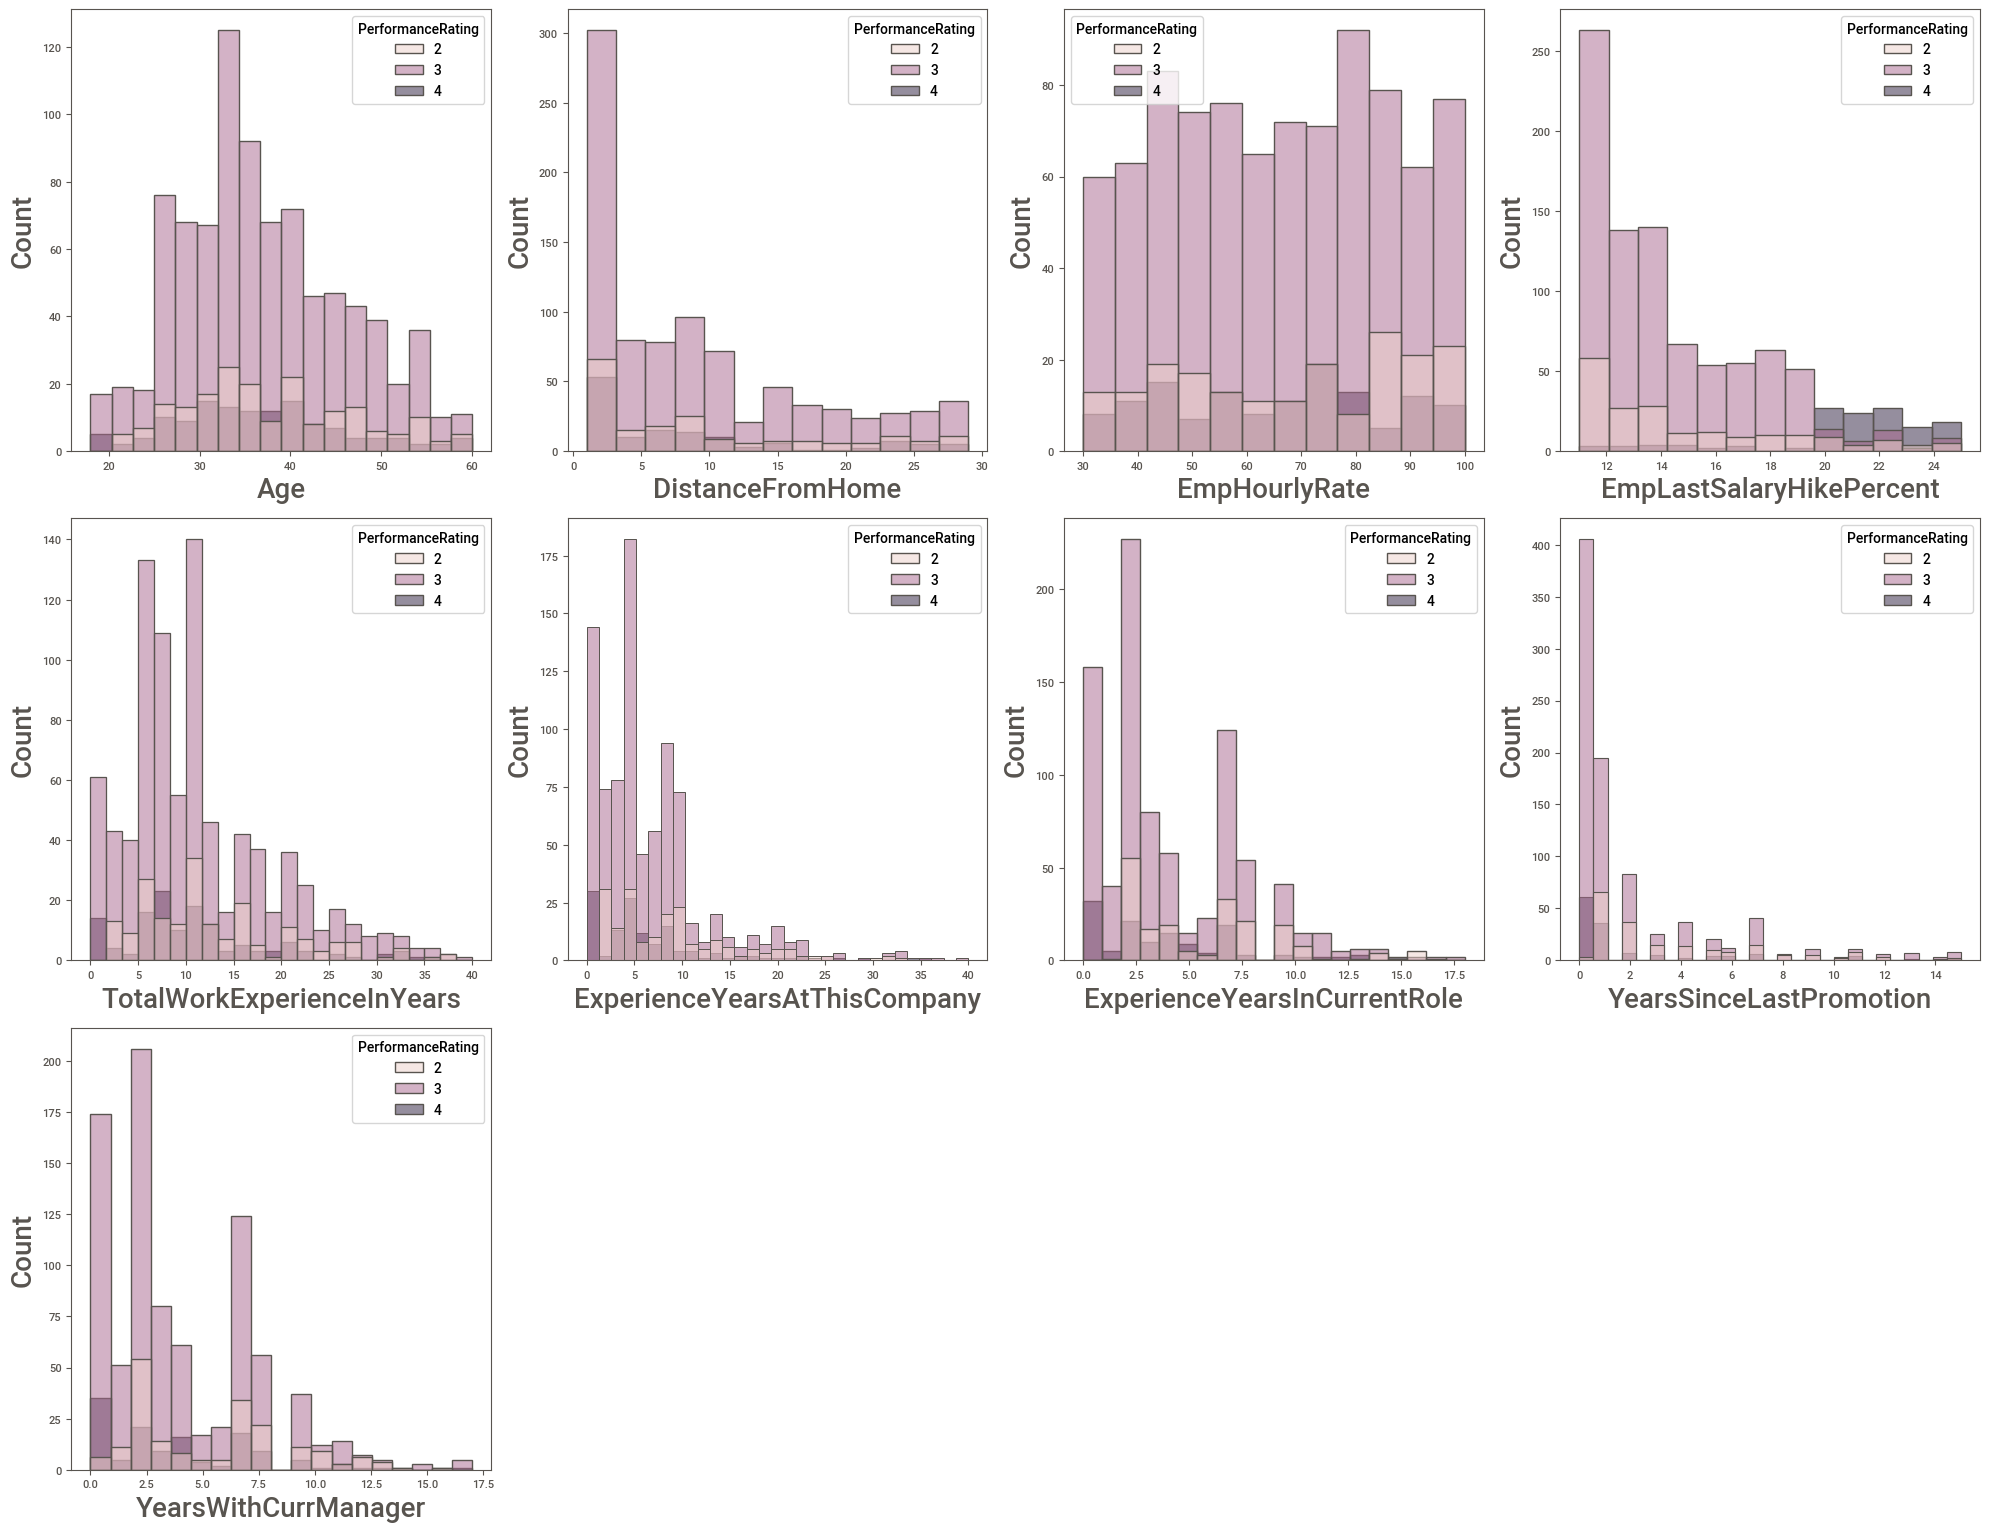

In [12]:
# For continuous data we will find correlation through histplot.
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data1:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(x=column,y=data.PerformanceRating,data=data1)   
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**For Age and Performance rating:** The graph shows that individuals around the age of 30 to 40 have the highest count with performance rating of 3 more often.
Graph shows that rating of 2 is the most common.

**For Distance from home and Performance rating:** The individuals whose having distance from home less than 10 km have performance rating more than 3.

**For Employee salary hike percent and Performance rating:** Here graph shows that people who got salary hike 5-19% are having performance rating 3. and people who got salary hike more than 19% are having performance rating 4.

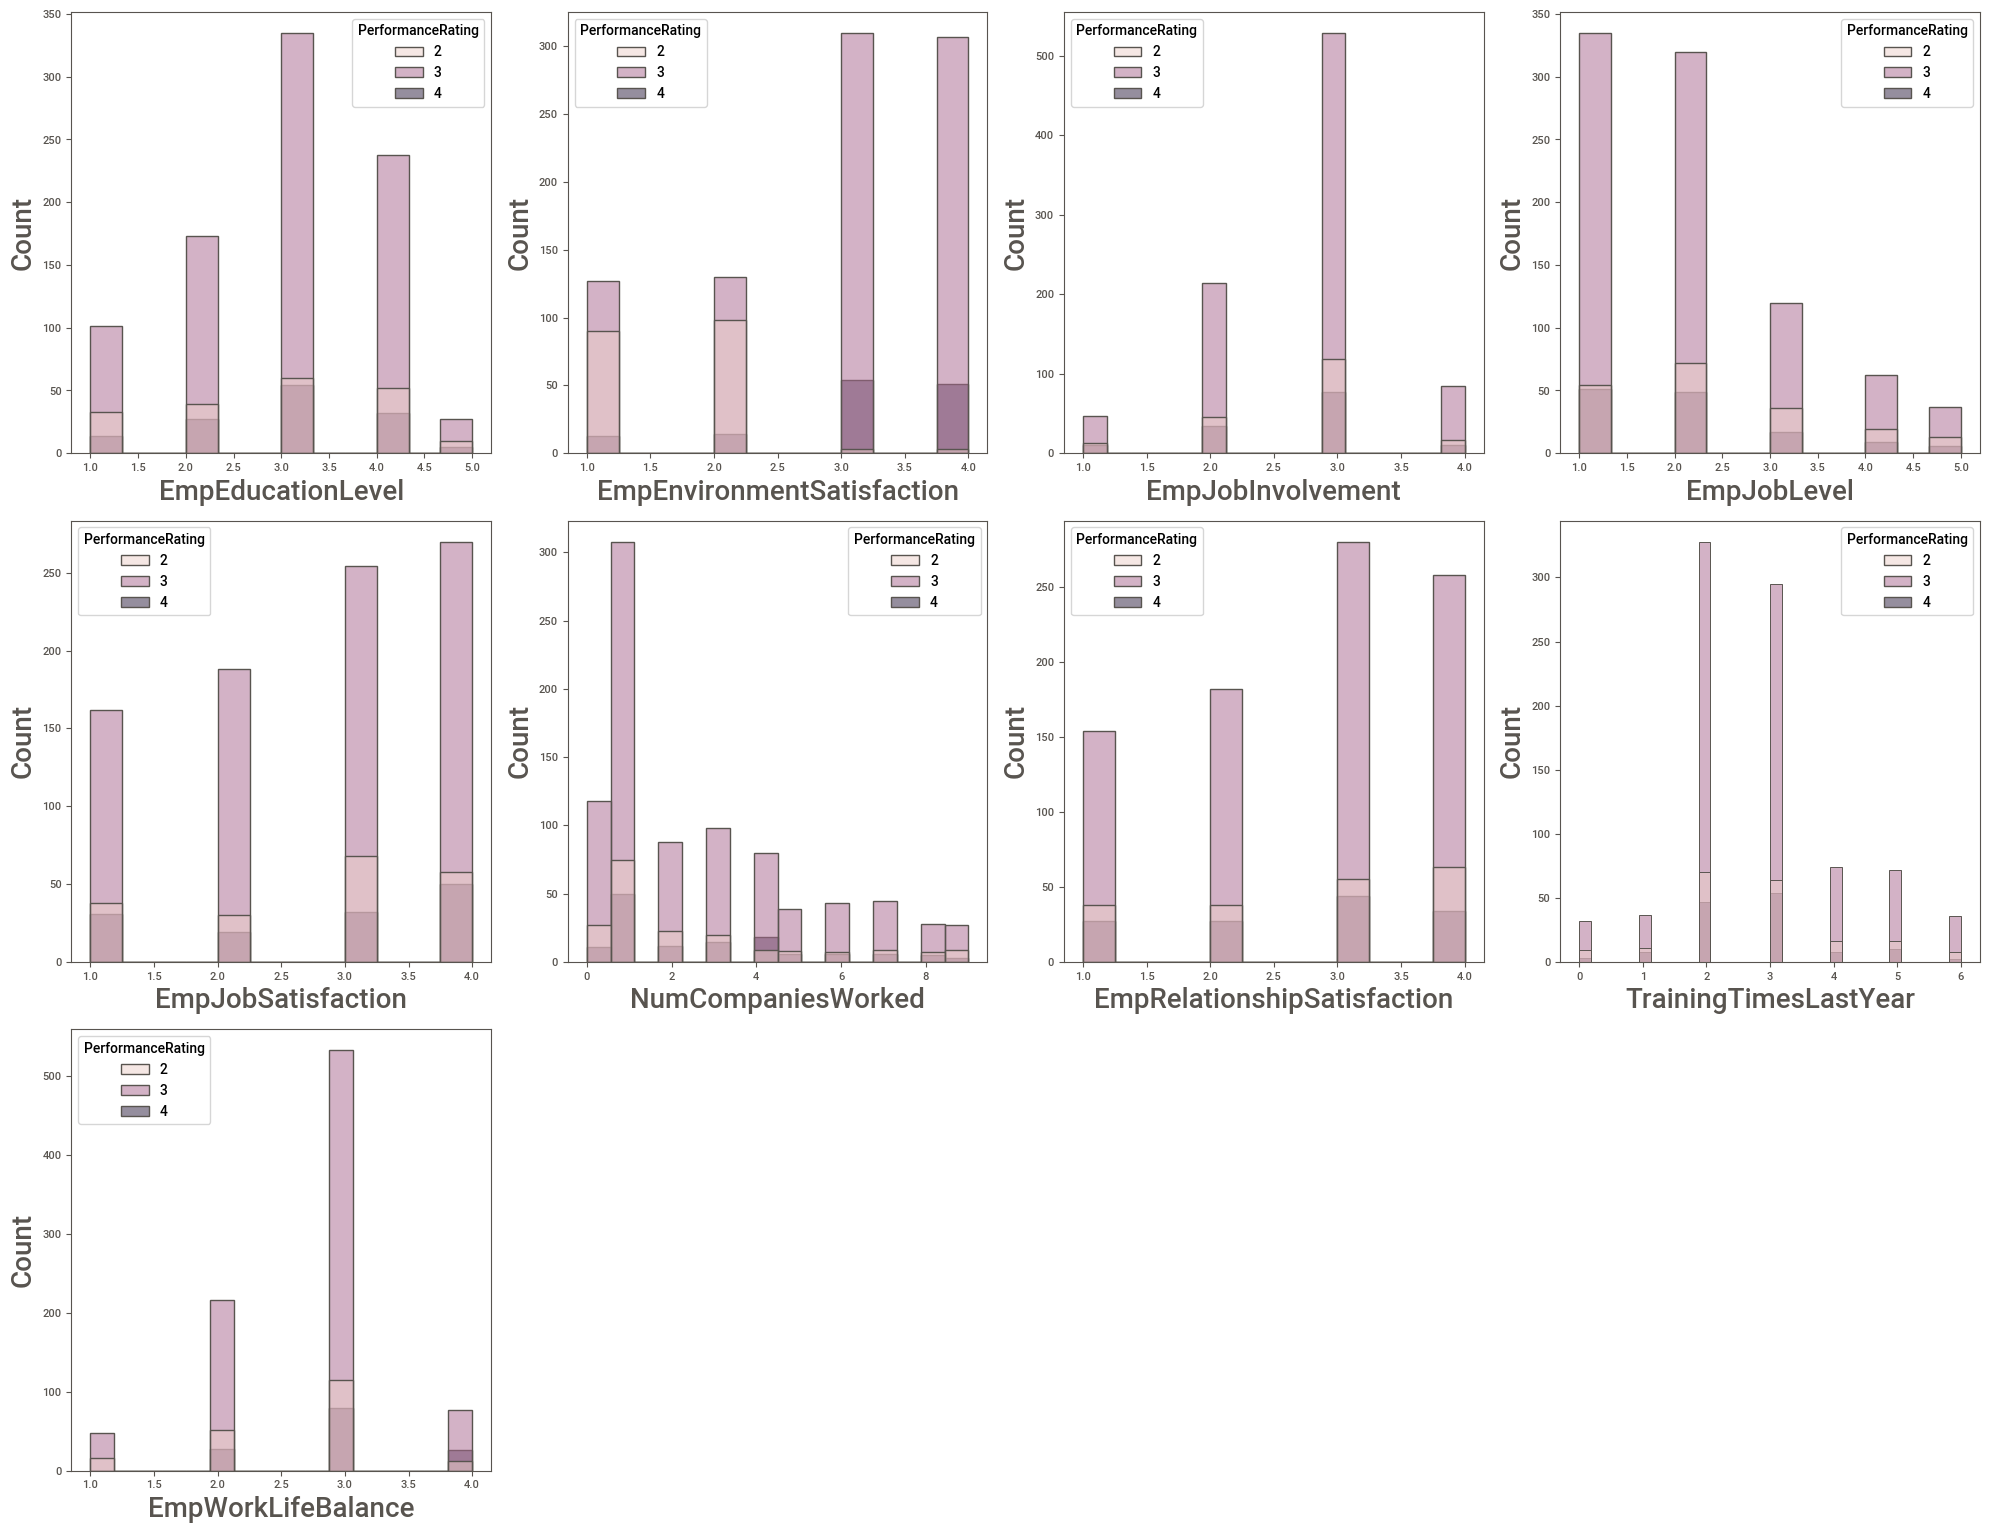

In [13]:
# For discrete data we will find correlation through 
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data2:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(x=column,hue=data.PerformanceRating,data=data2)   
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
# checking performance rating for other categorical data

for column in data3:
    performance_by_factor = data.groupby(column)['PerformanceRating'].mean()
    print(f"\nAverage PerformanceRating for each {column}:\n")
    print(performance_by_factor)


Average PerformanceRating for each Gender:

Gender
Female    2.949474
Male      2.947586
Name: PerformanceRating, dtype: float64

Average PerformanceRating for each EducationBackground:

EducationBackground
Human Resources     2.952381
Life Sciences       2.957317
Marketing           2.890511
Medical             2.940104
Other               3.060606
Technical Degree    2.940000
Name: PerformanceRating, dtype: float64

Average PerformanceRating for each MaritalStatus:

MaritalStatus
Divorced    2.958955
Married     2.917883
Single      2.984375
Name: PerformanceRating, dtype: float64

Average PerformanceRating for each EmpDepartment:

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

Average PerformanceRating for each EmpJobRole:

EmpJobRole
Business Analyst             3.18

##### 1.Individuals whose having marital status 'single' have highest performance rating.
##### 2.Job role 'Business Analyst'  has highest performance rating and 'Finance Manager' has lowest performance rating.

### Department wise performance rating

In [15]:
performance_by_department = data.groupby('EmpDepartment')['PerformanceRating'].mean()
print(performance_by_department)

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64


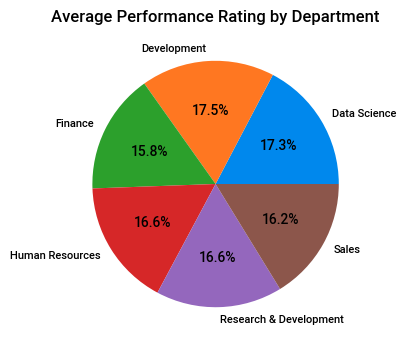

In [16]:
plt.figure(figsize=(8,4))
plt.pie(performance_by_department.values, labels=performance_by_department.index, autopct='%1.1f%%')

# Add title
plt.title('Average Performance Rating by Department')

# Show the plot
plt.show()

##### 1.The Development department has the highest average performance rating

##### 2.The Finance department has the lowest average performance rating

##### 3.The range of average performance ratings across all departments is relatively small (from about 2.776 to 3.086). This suggests that there is a relatively consistent level of performance across all departments.

In [17]:
columns = ['DistanceFromHome','EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'YearsSinceLastPromotion', 'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'Attrition']

# Analyze each factor
for column in columns:
    performance_by_factor = data.groupby(column)['PerformanceRating'].mean()
    print(f"\nAverage PerformanceRating for each {column}:\n")
    print(performance_by_factor)



Average PerformanceRating for each DistanceFromHome:

DistanceFromHome
1     2.958824
2     2.956522
3     3.029851
4     2.980392
5     2.925926
6     2.934783
7     3.000000
8     2.942029
9     2.893939
10    3.000000
11    3.040000
12    2.937500
13    2.857143
14    2.941176
15    2.764706
16    3.160000
17    3.000000
18    2.750000
19    2.944444
20    2.789474
21    2.933333
22    2.823529
23    2.909091
24    2.913043
25    3.000000
26    2.909091
27    3.000000
28    2.900000
29    2.826087
Name: PerformanceRating, dtype: float64

Average PerformanceRating for each EmpEnvironmentSatisfaction:

EmpEnvironmentSatisfaction
1    2.665217
2    2.652893
3    3.138965
4    3.132964
Name: PerformanceRating, dtype: float64

Average PerformanceRating for each EmpHourlyRate:

EmpHourlyRate
30     3.153846
31     2.769231
32     3.000000
33     2.937500
34     2.833333
         ...   
96     2.909091
97     2.944444
98     2.800000
99     2.684211
100    2.928571
Name: PerformanceRating


##### 1.with increase in EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent,  performance rating increases.

##### 2.EmpHourlyRate, EmpJobInvolvement,EmpJobSatisfaction, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, YearsSinceLastPromotion, ExperienceYearsInCurrentRole, YearsWithCurrManager, has no/very little effect on performance rating.

##### 3.with increase in EmpJobLevel PerformanceRating decreases.

##### 4.ExperienceYearsAtThisCompany 0-10 & 20-30 years at this comapany has better perfomance rating

##### 5.Employee leaving in 10 km radium has better performance rating than 10-20 and 20-29 km radius.


# Data PreProcessing

### Handle Null values

In [18]:
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

##### There are no null values.

### Handle Categorical data

In [19]:
data3

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [20]:
for column in data3:
    unique_values = data3[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Gender: ['Male' 'Female']
Unique values in EducationBackground: ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in EmpDepartment: ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Unique values in EmpJobRole: ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
Unique values in BusinessTravelFrequency: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in OverTime: ['No' 'Yes']
Unique values in Attrition: ['No' 'Yes']


In [21]:
gender_mapping = {'Male': 0, 'Female': 1}
education_background_mapping = {'Marketing': 0, 'Life Sciences': 1, 'Human Resources': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
marital_status_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
emp_department_mapping = {'Sales': 0, 'Human Resources': 1, 'Development': 2, 'Data Science': 3, 'Research & Development': 4, 'Finance': 5}
emp_job_role_mapping = {'Sales Executive': 0, 'Manager': 1, 'Developer': 2, 'Sales Representative': 3, 'Human Resources': 4, 'Senior Developer': 5, 'Data Scientist': 6, 'Senior Manager R&D': 7, 'Laboratory Technician': 8, 'Manufacturing Director': 9, 'Research Scientist': 10, 'Healthcare Representative': 11, 'Research Director': 12, 'Manager R&D': 13, 'Finance Manager': 14, 'Technical Architect': 15, 'Business Analyst': 16, 'Technical Lead': 17, 'Delivery Manager': 18}
business_travel_frequency_mapping = {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
over_time_mapping = {'No': 0, 'Yes': 1}
attrition_mapping = {'No': 0, 'Yes': 1}

# Apply the mappings to the dataframe
data['Gender'] = data['Gender'].map(gender_mapping)
data['EducationBackground'] = data['EducationBackground'].map(education_background_mapping)
data['MaritalStatus'] = data['MaritalStatus'].map(marital_status_mapping)
data['EmpDepartment'] = data['EmpDepartment'].map(emp_department_mapping)
data['EmpJobRole'] = data['EmpJobRole'].map(emp_job_role_mapping)
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map(business_travel_frequency_mapping)
data['OverTime'] = data['OverTime'].map(over_time_mapping)
data['Attrition'] = data['Attrition'].map(attrition_mapping)


In [22]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,0,0,0,0,0,0,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,0,0,0,0,0,0,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,0,1,1,0,0,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,0,2,2,1,1,0,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,0,0,0,0,0,0,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,1,3,2,0,0,1,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0,4
1196,37,0,1,0,2,5,0,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0,3
1197,50,0,3,1,2,5,0,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0,3
1198,34,1,3,0,3,6,0,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0,3


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int64
 2   EducationBackground           1200 non-null   int64
 3   MaritalStatus                 1200 non-null   int64
 4   EmpDepartment                 1200 non-null   int64
 5   EmpJobRole                    1200 non-null   int64
 6   BusinessTravelFrequency       1200 non-null   int64
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

### Handle Outliers

In [24]:
data1

,Age,DistanceFromHome,EmpHourlyRate,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,55,12,10,10,7,0,8
1,47,14,42,12,20,7,7,1,7
2,40,5,48,21,20,18,13,1,12
3,41,10,73,15,23,21,6,12,6
4,60,16,84,14,10,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1195,27,3,71,20,6,6,5,0,4
1196,37,10,80,17,4,1,0,0,0
1197,50,28,74,11,20,20,8,3,8
1198,34,9,46,14,9,8,7,7,7


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

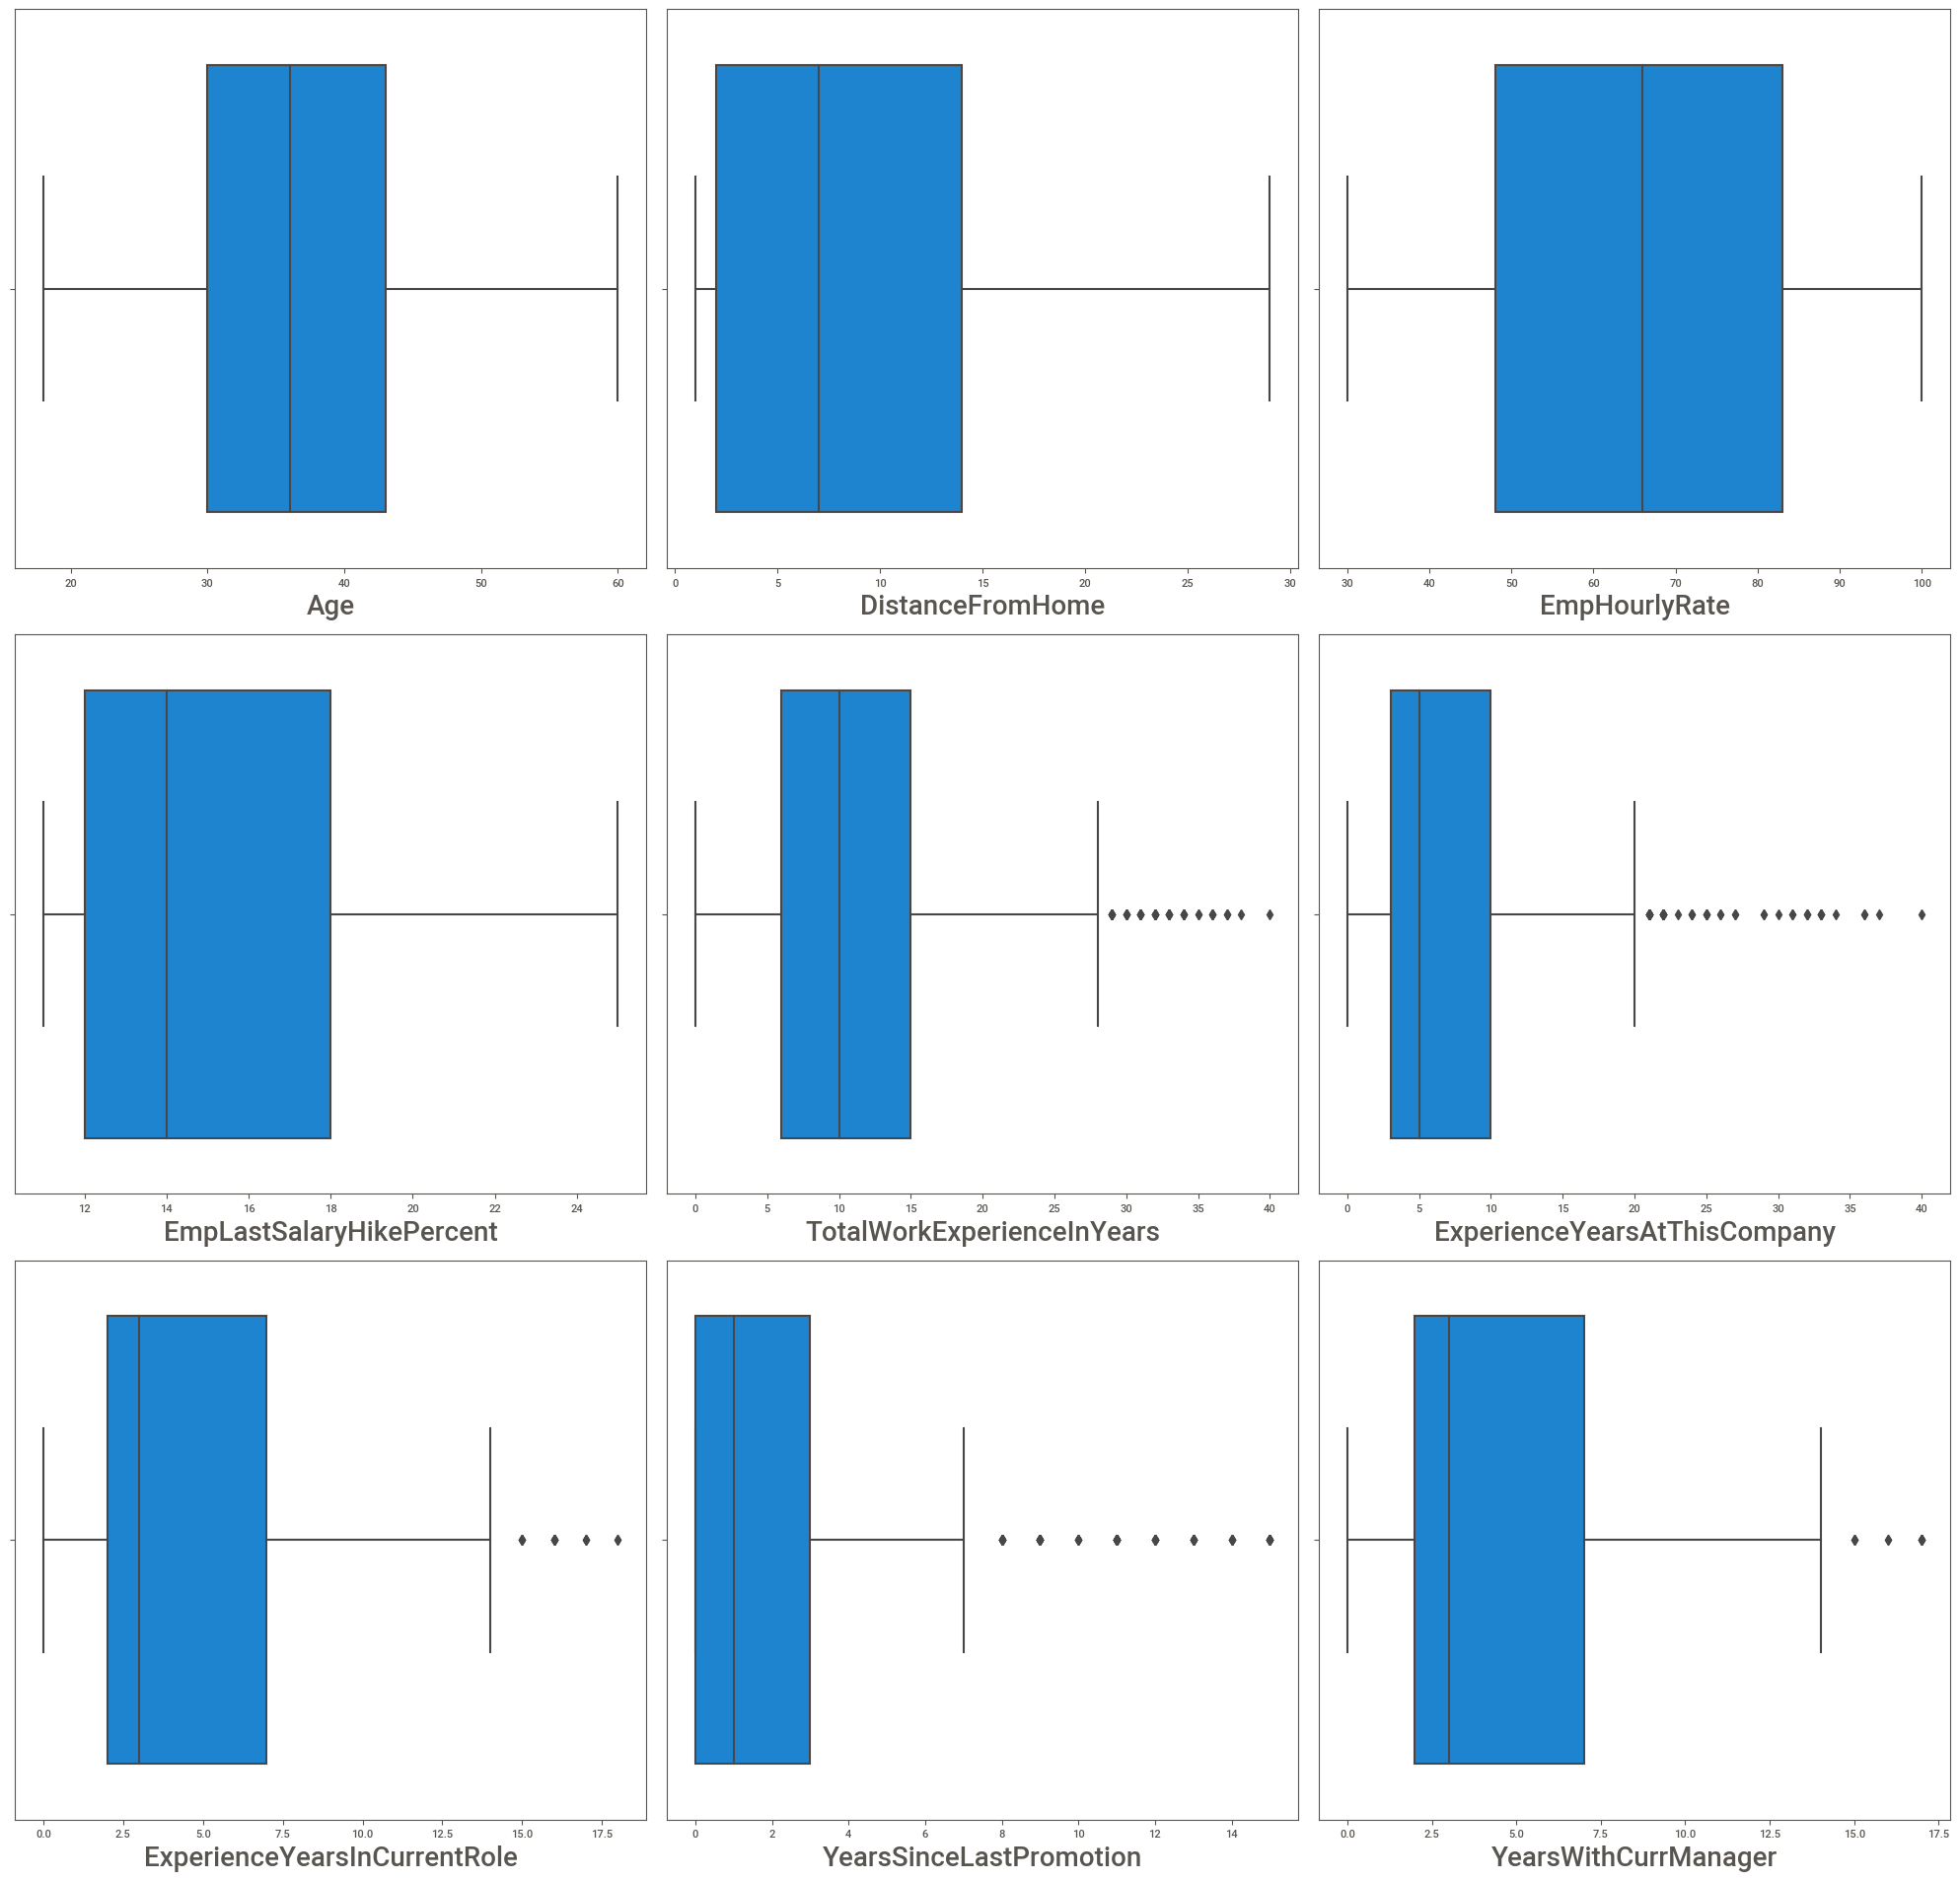

In [25]:
# We will check presence of outliers on continuous data

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [26]:
# Calculate Q1, Q2 and IQR
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = data[(data['ExperienceYearsAtThisCompany'] < lower_bound) | (data['ExperienceYearsAtThisCompany'] > upper_bound)]

# Calculate the percentage of outliers
percentage_of_outliers = len(outliers) / len(data) * 100

percentage_of_outliers


4.666666666666667

**Insights:**

**by analysing domain knowledge and data we can say that what appear as outlier are infact are extreme values. ExperienceYearsAtThisCompany has most extreme values (4.66%) which is quite normal thing. Other features have in comparison very little extreme values. So for this data we are considering thse extreme values to be valid.** 

# Feature Selection

<AxesSubplot:>

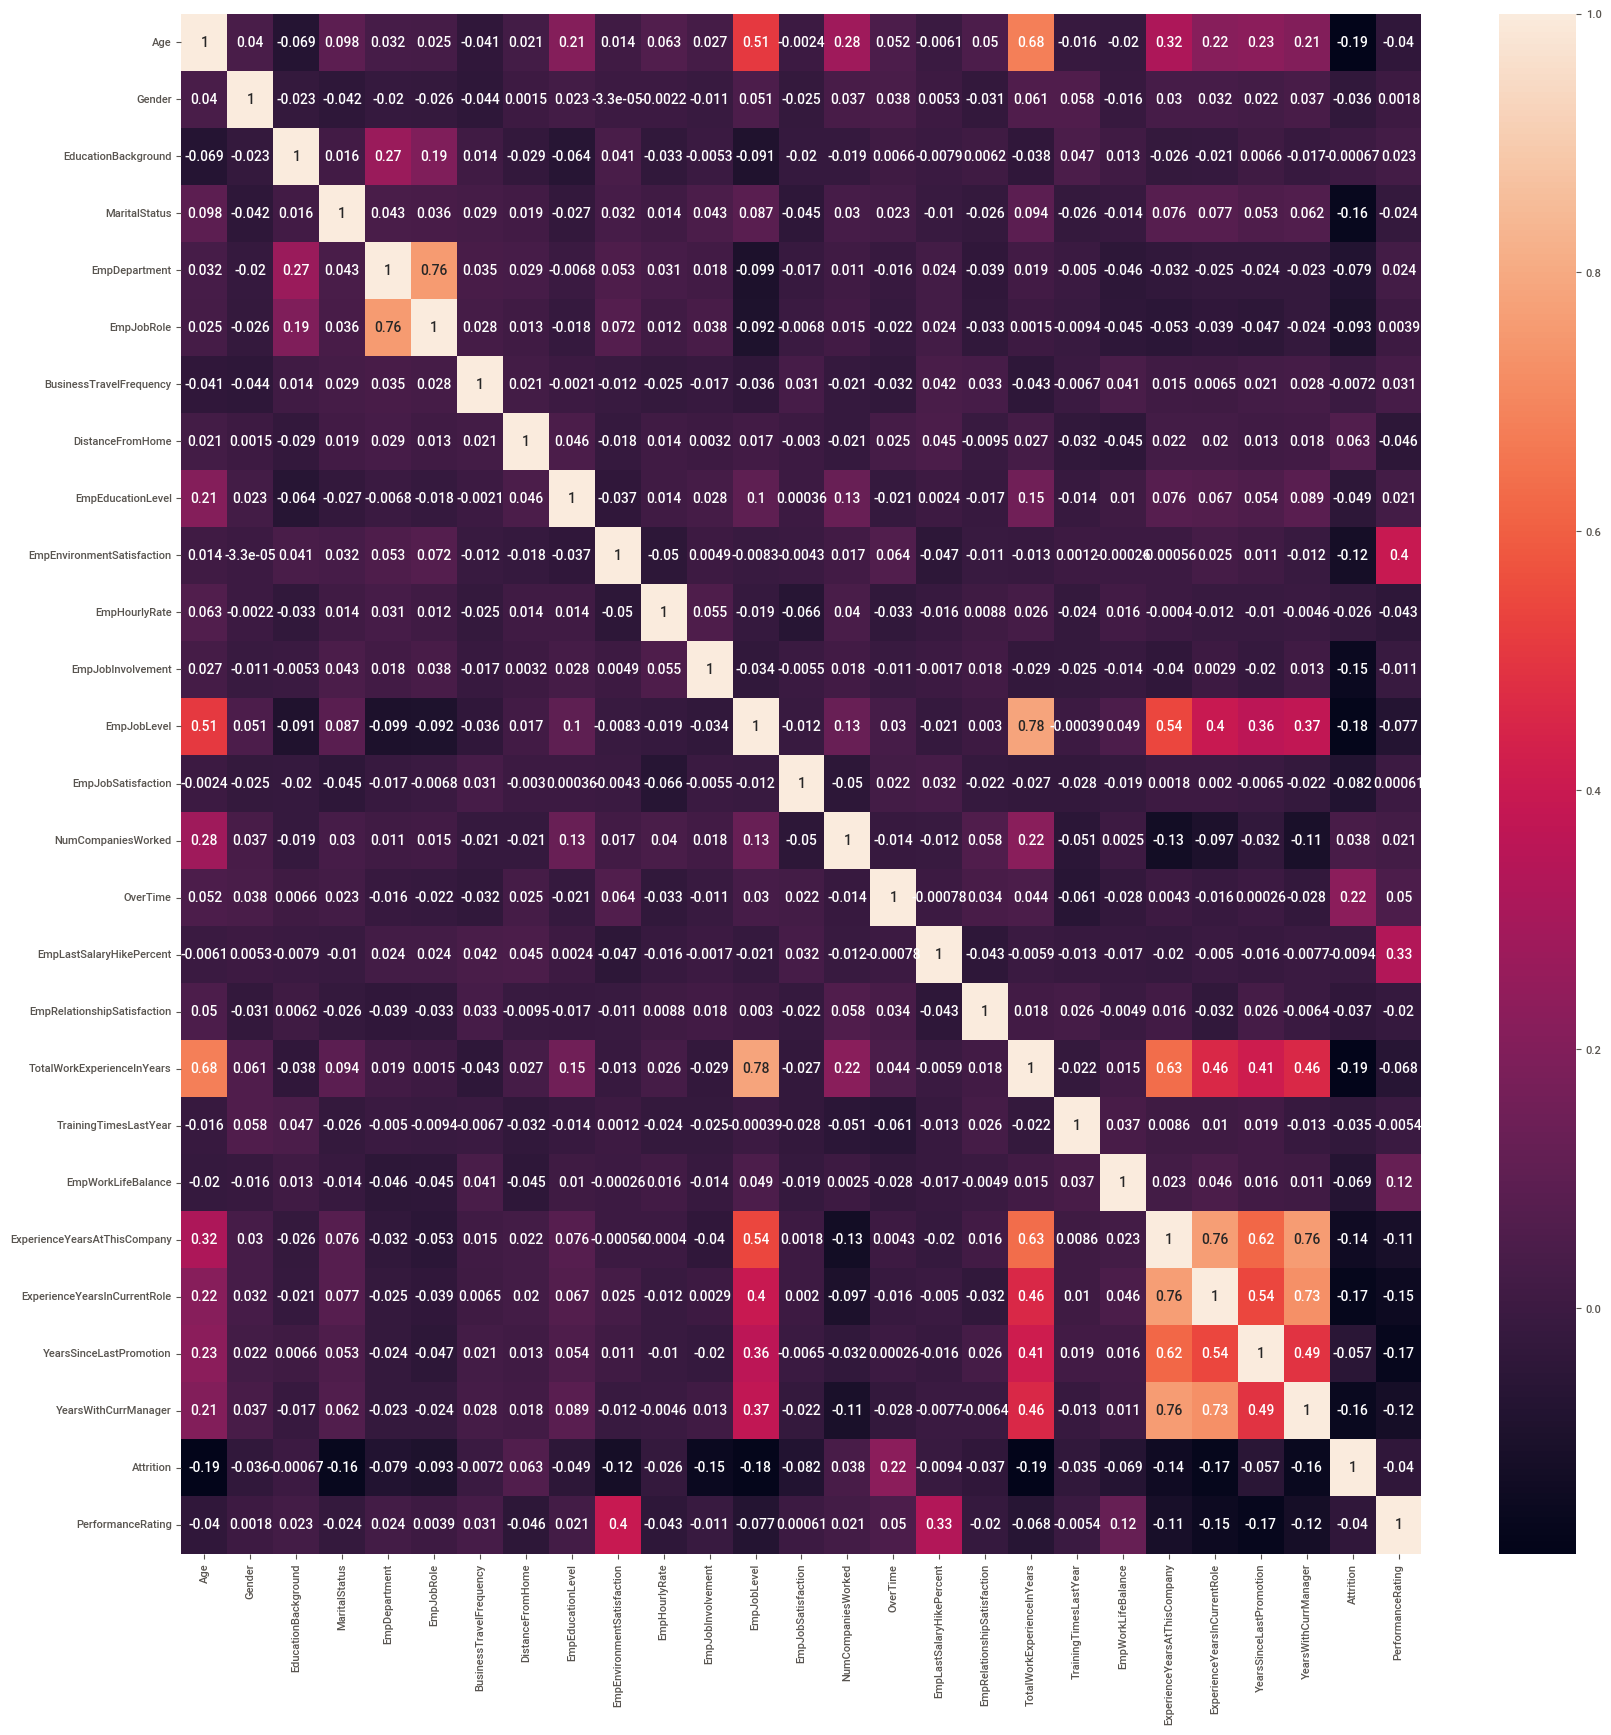

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

##### There are no perfect linear relationship between two variables. hence non need to drop any feature.

## Identifying the 3 top most important features influencing 'PerformanceRating' 


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with features and 'PerformanceRating'
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

# Display the top three features
top_three_features = feature_importance_data.head(3)
print(top_three_features)

                       Feature  Importance
16    EmpLastSalaryHikePercent    0.233208
9   EmpEnvironmentSatisfaction    0.190246
23     YearsSinceLastPromotion    0.081087


**ML test shows that top 3 features which has bearing on Performance of employee is:**

1.Time period since last Salary Hike

2.Environment Satisfaction

3.Years since last promotion

# Model Creation

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame with features and 'PerformanceRating'

# Feature columns
X = data.drop('PerformanceRating', axis=1)

# Target variable
y = data['PerformanceRating']

# Use LabelEncoder to transform class labels to start from 0
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')

# Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print(f'ANN Accuracy: {ann_accuracy}')

SVM Accuracy: 0.7666666666666667
Random Forest Accuracy: 0.9333333333333333
XGBoost Accuracy: 0.9208333333333333
ANN Accuracy: 0.7791666666666667


### Hyperparameter tuning

##### As we can see, 'Random Forest' model is having best accuracy score. So we will go with hyperparameter tuning of Random Forest

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, 
                                   scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best Accuracy:  0.9239583333333332


In [31]:
# Extract the best parameters from the Random Search results
best_params = random_search.best_params_

# Create the final Random Forest Classifier with the best parameters
final_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the final model to the training data
final_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
final_rf_predictions = final_rf_classifier.predict(X_test)

# Calculate final accuracy
final_accuracy = accuracy_score(y_test, final_rf_predictions)
print(f'Final Random Forest Classifier Accuracy: {final_accuracy}')


Final Random Forest Classifier Accuracy: 0.9333333333333333


In [32]:
from sklearn.model_selection import cross_val_score

# Assuming final_rf_classifier is your trained Random Forest Classifier

# Perform cross-validation
cv_scores = cross_val_score(final_rf_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)


Cross-Validation Scores: [0.9        0.9375     0.98333333 0.89583333 0.89583333]
Mean Accuracy: 0.9225


**Insights**

The mean accuracy is 0.9225, indicating the average performance of the model across all folds. This gives you a general idea of how well the model is expected to perform on new, unseen data.

# Evaluation Report

This data science project has yielded valuable insights that can help address the current performance issues. Here’s how these findings can be beneficial:

**1.Department-wise performances:**

Understanding the performance of each department can help identify specific areas that need improvement. This can lead to targeted interventions and strategies, improving overall service delivery.

**2.Top 3 Important Factors affecting employee performance:**

The factors identified - **1.Environment Satisfaction 2.Time period since last Salary Hike and 3.Years since last promotion**

 are crucial in understanding employee performance. By addressing these factors, INX can enhance employee satisfaction and performance, thereby improving client satisfaction levels.

**3.Trained model for predicting employee performance:**

The robust **Random Forest model**, with an accuracy score of **93.33% and a Cross-Validation Mean accuracy Score of 92.25%**, can predict employee performance based on various factors. This model **can be used during the hiring process to select potential high-performing employees, ensuring a high standard of service delivery.**

**4.Recommendations to improve employee performance:**

**Based on the analysis, targeted recommendations can be made to improve employee performance. For instance, improving the work environment, considering timely salary hikes, and recognizing employee efforts through promotions can boost morale and performance.**

By implementing these insights, INX Future Inc. can maintain its reputation as a top employer while ensuring high service delivery and client satisfaction levels. This approach also ensures that any necessary actions are data-driven, minimizing the impact on overall employee morale.